
#  Inferential Statistics

## PETE 2061 Lab 8 Workbook 

## THIS IS DUE BY 11:59 PM TODAY (Oct 14, 2019)

1. **Using the example in "lab8_inferential_stats.ipynb", write a Python code to compute the confidence interval for the winning percentage of Ed Orgeron based on "poll-larger.csv", and show that he is the likely winner within a 95% confidence interval**
2. Type out:
    * (a) the 95% confidence interval
    * (b) the point estimate
    * (c) the margin of error.

In [2]:
import math
import io
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

import scipy.stats
import scipy.optimize
import scipy.spatial

In [7]:
poll = pd.read_csv('poll.csv')
poll.info() 
poll.head() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
vote    1000 non-null object
dtypes: object(1)
memory usage: 7.9+ KB


,vote
0,Saban
1,Orgeron
2,Saban
3,Saban
4,Saban


In [8]:
def sample(orgeronWinPercent,n=1000):
    return pd.DataFrame({'vote': np.where(np.random.rand(n) < orgeronWinPercent,'Saban','Orgeron')})


In [9]:
poll['vote'].value_counts(normalize=True)

Saban      0.511
Orgeron    0.489
Name: vote, dtype: float64

In [10]:
s = sample(0.489,n=1000) 
s = sample(0.511,n=1000) 
res = s['vote'].value_counts(normalize=True)
type(res)

pandas.core.series.Series

In [11]:
distDF = pd.DataFrame([sample(0.511)['vote'].value_counts(normalize=True) for i in range(1000)])
distDF.head()

,Saban,Orgeron
vote,0.510,0.490
vote,0.511,0.489
vote,0.494,0.506
vote,0.532,0.468
vote,0.488,0.512


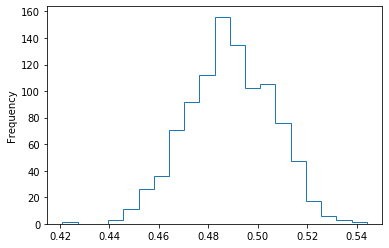

In [14]:
distDF['Orgeron'].plot(kind='hist',histtype='step',bins=20)

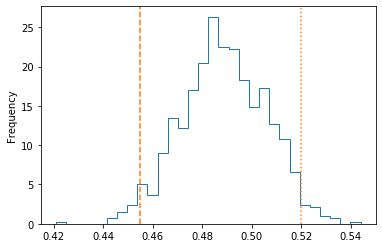

In [15]:
distDF['Orgeron'].plot(kind='hist',histtype='step',bins=30, density=True)
plt.axvline(distDF['Orgeron'].quantile(0.025), c='C1',linestyle='--')
plt.axvline(distDF['Orgeron'].quantile(0.975), c='C1',linestyle=':')

In [18]:
def samplingdist(orgeronWinPercent,n=1000):
    return pd.DataFrame([sample(orgeronWinPercent,n)['vote'].value_counts(normalize=True) for i in range(1000)])

In [19]:
def quantiles(orgeronWinPercent,n=1000):
    distDF = samplingdist(orgeronWinPercent,n)
    return distDF['Orgeron'].quantile(0.025), distDF['Orgeron'].quantile(0.975)
quantiles(0.51)
distDF = samplingdist(0.50,10000)

(0.4901, 0.5102025)

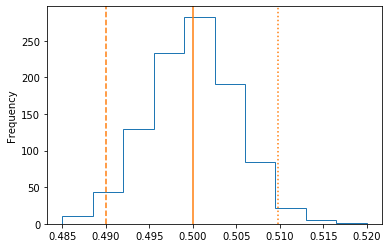

In [20]:
distDF['Orgeron'].plot(kind='hist', histtype='step')
plt.axvline(distDF['Orgeron'].quantile(0.025), c='C1',linestyle='--')
plt.axvline(distDF['Orgeron'].quantile(0.500), c='C1')
plt.axvline(distDF['Orgeron'].quantile(0.975), c='C1',linestyle=':')
quantiles(0.5,10000)

In [21]:
largepoll = pd.read_csv('poll-larger.csv')
largepoll['vote'].value_counts(normalize=True)

Orgeron    0.5181
Saban      0.4819
Name: vote, dtype: float64